# Simple Linear Regression


$$y = a + bx + e$$

Estimate $a$ and $b$ with normal equations:

$$b = \frac{n\sum{x_{i}y_{i} - \sum{x_{i}}\sum{y_{i}}}}{n\sum{x_{i}^{2}} - (\sum{x_{i}})^{2}}$$

$$a = \bar{y} - b\bar{x}$$

We need to compute:
 
 - $\sum{x_{i}}$
 
 - $\sum{y_{i}}$
 
 - $\sum{x_{i}^{2}}$
 
 - $\sum{x_{i}y_{i}}$

Our dataset:

x = [1, 2, 3, 4, 5, 6, 7]

y = [0.5, 2.5, 2, 4, 2.5, 6, 5.5]

In [1]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 7))
plt.scatter([1, 2, 3, 4, 5, 6, 7], [0.5, 2.5, 2, 4, 2.5, 6, 5.5]);

In [3]:
def least_squares(x, y):
    
    n = len(x)
    xsum = 0
    ysum = 0
    xsq = 0
    s = 0
    
    for i in range(n):
        
        xsum += x[i]
        ysum += y[i]
        xsq += x[i] ** 2
        s += x[i] * y[i]
    
    print("Sum of x: ", xsum)
    print("Sum of y: ", ysum)
    print("Sum of x ** 2: ", xsq)
    print("Sum of x * y: ", s)
    
    xmean = xsum / n
    ymean = ysum / n
    
    b = (n * s - xsum * ysum) / (n * xsq - xsum ** 2)
    a = ymean - b * xmean
    print('Estimated Function: y = {:.2} + {:.2}x'.format(a, b))
    return a, b

x = [1, 2, 3, 4, 5, 6, 7]
y = [0.5, 2.5, 2, 4, 2.5, 6, 5.5]

a, b = least_squares(x, y)


Sum of x:  28
Sum of y:  23.0
Sum of x ** 2:  140
Sum of x * y:  114.5
Estimated Function: y = 0.071 + 0.8x


# Newton - Raphson

$$x_{n + 1} = x_{n} - \frac{f(x_{n})}{f'(x_{n})}$$

We need:

 - The function.
 - The derivative.
 - An epsilon.
 - A starting point.

$$f(x) = x^{2} - 4x -7$$

In [4]:
import numpy as np
import matplotlib.pyplot as plt

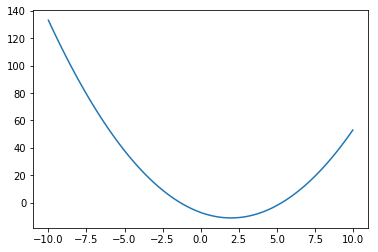

In [5]:
f = lambda x: x ** 2 - 4 * x - 7
df = lambda x: 2 * x - 4

x = np.linspace(-10, 10, 100)
y = f(x)
plt.plot(x, y)


In [6]:
def newton_raphson(f, df, epsilon, x0):
    x = x0
    i = 0
    while abs(f(x)) > epsilon:
        x = x - f(x)/df(x)
        i += 1
        
    print("The method converged to {} in {} iterations. (epsilon = {})".format(x, i, epsilon))
    return x
newton_raphson(f, df, 0.01, -10)

The method converged to -1.3173802020319245 in 4 iterations. (epsilon = 0.01)


-1.3173802020319245

## The Secant Method

$$x_{i + 1} = x_{i} - \frac{f(x_{i - 1})(x_{i - 1} - x_{i}) }{f(x_{i - 1}) - f(x_{i})}$$

$$f(x) = e^{-x} - x$$

$x_{0} = 1$,
$x_{-1} = 0$

Function:


```
def secant_method (f, x0, x_1):
    // your code here
    return x
```

solution: 

x = [0.5, 0.5663110031972182, 0.5671431650348622, 0.5671432904097811, 0.5671432904097811]


et = [100.0, 11.709290976662398, 0.14672870783743905, 2.2106391984397626e-05]

## Pandas

In [7]:
import pandas as pd

Import functions:

```
pd.import_csv()
pd.import_excel()


```

Datasets:

 - Boston Crimes Dataset (ISO-8859-1): crimes.csv
 - Google Reads Books: books.csv
 

In [23]:
books = pd.read_csv('data/books.csv', error_bad_lines=False)
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13714 entries, 0 to 13713
Data columns (total 10 columns):
bookID                13714 non-null int64
title                 13714 non-null object
authors               13714 non-null object
average_rating        13714 non-null float64
isbn                  13714 non-null object
isbn13                13714 non-null int64
language_code         13714 non-null object
# num_pages           13714 non-null int64
ratings_count         13714 non-null int64
text_reviews_count    13714 non-null int64
dtypes: float64(1), int64(5), object(4)
memory usage: 1.0+ MB


b'Skipping line 4012: expected 10 fields, saw 11\nSkipping line 5688: expected 10 fields, saw 11\nSkipping line 7056: expected 10 fields, saw 11\nSkipping line 10601: expected 10 fields, saw 11\nSkipping line 10668: expected 10 fields, saw 11\n'


In [24]:
books.describe()

,bookID,average_rating,isbn13,# num_pages,ratings_count,text_reviews_count
count,13714.000000,13714.000000,1.371400e+04,13714.000000,1.371400e+04,13714.000000
mean,22159.859195,3.930620,9.764017e+12,342.402727,1.776540e+04,533.632128
std,13700.926816,0.357893,3.987679e+11,252.650165,1.129572e+05,2529.006691
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10619.250000,3.770000,9.780345e+12,196.000000,8.300000e+01,7.000000
50%,21321.500000,3.960000,9.780613e+12,301.000000,6.305000e+02,40.000000
75%,33311.750000,4.130000,9.780940e+12,421.000000,4.742250e+03,222.000000
max,47709.000000,5.000000,9.790008e+12,6576.000000,5.629932e+06,93619.000000


In [22]:
books['title'].value_counts()

One Hundred Years of Solitude                                                     11
'Salem's Lot                                                                      11
The Brothers Karamazov                                                            10
The Iliad                                                                         10
A Midsummer Night's Dream                                                          9
Gulliver's Travels                                                                 9
The Lord of the Rings (The Lord of the Rings  #1-3)                                9
Collected Stories                                                                  9
A Tale of Two Cities                                                               9
The Odyssey                                                                        8
Robinson Crusoe                                                                    8
Anna Karenina                                                    